<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
import bfseg.data.nyu_subsampled
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


import bfseg.models.fast_scnn

Segmentation Models: using `tf.keras` framework.


In [9]:
from bfseg.utils.models import create_model
from tensorflow import keras

encoder, full_model = create_model(
    model_name="fast_scnn",
    freeze_encoder=False,
    freeze_whole_model=False,
    normalization_type="group",
    image_h=480,
    image_w=640)
model = keras.Model(
    inputs=full_model.input,
    outputs=full_model.output)

model.load_weights('/home/blumh/Downloads/model_epoch_42_group_norm.h5')


Using the following parameters to instantiate the model fast_scnn: {'input_shape': (480, 640, 3), 'num_downsampling_layers': 3, 'num_classes': 2, 'normalization_type': 'group'}.



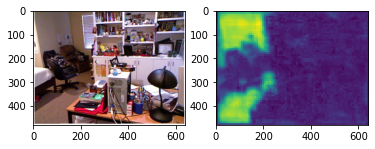

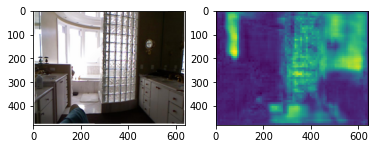

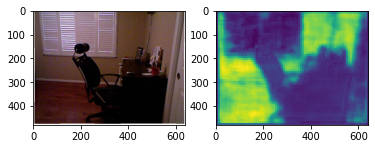

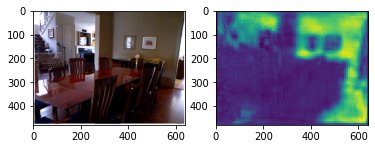

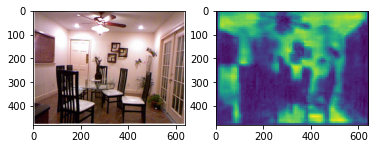

In [12]:
ds = tfds.load('nyu_subsampled', split='full').take(5)
for blob in ds.batch(1):
    pred = model(blob['image'])
    _, axs = plt.subplots(1, 2)
    axs[0].imshow(blob['image'][0])
    axs[1].imshow(pred[0, ..., 1])

In [8]:
pred

[<tf.Tensor: shape=(1, 60, 80, 128), dtype=float32, numpy=
 array([[[[0.8824412 , 2.3630943 , 0.        , ..., 0.        ,
           0.8003343 , 0.        ],
          [0.7330728 , 1.4261347 , 0.        , ..., 0.        ,
           1.2648132 , 0.        ],
          [0.6750307 , 1.4965842 , 0.        , ..., 0.        ,
           1.2007222 , 0.        ],
          ...,
          [0.7036275 , 1.2676662 , 0.44867593, ..., 0.        ,
           0.9311579 , 0.        ],
          [2.5171714 , 0.908654  , 0.3141988 , ..., 0.        ,
           1.5822346 , 0.        ],
          [0.40805244, 0.        , 0.        , ..., 1.2244381 ,
           2.946448  , 0.        ]],
 
         [[0.9814714 , 2.156479  , 0.        , ..., 0.2468125 ,
           1.0565515 , 0.        ],
          [0.7740668 , 1.1300824 , 0.35499436, ..., 0.        ,
           0.09707914, 0.        ],
          [0.80945927, 1.2879257 , 0.23906444, ..., 0.        ,
           0.00459079, 0.        ],
          ...,
        

In [13]:
!rm -rf /tmp/exported_model
model.save('/tmp/exported_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/exported_model/assets


INFO:tensorflow:Assets written to: /tmp/exported_model/assets


In [14]:
from shutil import make_archive
make_archive('/tmp/exported_model', 'zip', '/tmp/exported_model')

'/tmp/exported_model.zip'

In [15]:
!rclone copy /tmp/exported_model.zip construction:/background_foreground_segmentation_paper/models/